# Traditional Machine Learning and Deep Learning

Author: Allmin Susaiyah

Name of student: <fill your name>

In this notebook, various machine learning operations of python are covered. shift + Enter will excecute each cell

# Simple ML Example

In [30]:
# installing libraries if not already installed
%pip install numpy 
%pip install scikit-learn
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [31]:
# Importing the NumPy library with the alias 'np'
import numpy as np

# Creating a NumPy array 'X' representing the training data
X = np.array([[6000], [4000], [4500], [4230], [2227]])

# Creating a NumPy array 'y' representing the corresponding target values
y = np.array([15000, 23241, 43000, 9990, 69900])

# Installing scikit-learn using pip if not already installed
# Uncomment  (remove the # at the beginning of the line) the 
# following line if scikit-learn is not installed
# You can run this in your terminal or command prompt.
# !pip install scikit-learn

# Importing the LinearRegression model from scikit-learn
from sklearn.linear_model import LinearRegression

# Creating an instance of the LinearRegression model
clf = LinearRegression()

# Fitting the model to the training data
clf.fit(X, y)

# Retrieving the coefficients of the linear regression model
coef = clf.coef_

# Printing the coefficients
print(coef)


[-13.90222634]


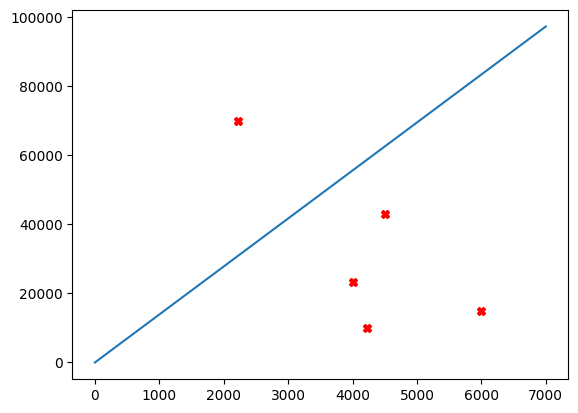

In [32]:
# code to plot the linear regression model trained above

# Importing the Matplotlib library with the alias 'plt'
import matplotlib.pyplot as plt

# Creating an empty plot
plt.plot()

# Creating an array of x values from 0 to 7000
x_axis = np.linspace(0, 7000)

# Creating an array of y values using the linear regression coefficients
y_axis = [(0 - coef[0] * x) for x in x_axis]

# Plotting the linear regression line
plt.plot(x_axis, y_axis)

# Plotting the training data points as red 'X'
plt.plot(X, y, 'rX')


In [33]:
# Validating a trained model

# Importing the NumPy library with the alias 'np'
import numpy as np

# Creating a NumPy array 'X_' representing the validation data
X_ = np.array([[1150], [5000]])

# Creating a NumPy array 'y_' representing the corresponding target values for validation
y_ = np.array([3499, 12447])

# Using the trained model to predict target values for the validation data
y_predicted = clf.predict(X_)

# Printing the data type of 'y_'
print(type(y_))

# Printing the predicted values and the actual values for comparison
print("Predicted values:", y_predicted)
print("Actual values:", y_)

# Importing the mean_absolute_error function from scikit-learn
from sklearn.metrics import mean_absolute_error

# Calculating the mean absolute error between the predicted and actual values
error = mean_absolute_error(y_, y_predicted)

# Printing the mean absolute error
print('Mean Absolute Error:', error)


<class 'numpy.ndarray'>
Predicted values: [74508.43120535 20984.85977752]
Actual values: [ 3499 12447]
Mean Absolute Error: 39773.645491434465


In [34]:

# Predicting the target value for a new input data point [[2815]] (deployment)
prediction_1 = clf.predict([[2815]])
print("Prediction for input [[2815]]:", prediction_1)

# Predicting the target value for another new input data point [[4300]]
prediction_2 = clf.predict([[4300]])
print("Prediction for input [[4300]]:", prediction_2)



Prediction for input [[2815]]: [51361.22434111]
Prediction for input [[4300]]: [30716.41821895]


# Problem varying performance

Coefficients: [-4.40384078]
Validation set type: <class 'numpy.ndarray'>
Predicted values for validation set: [36571.81145251 31828.87493017]
Mean Absolute Error for validation set: 35571.968261173184
Deployment prediction for [[2815]]: [29239.41655028]
Deployment prediction for [[4300]]: [22699.71298883]


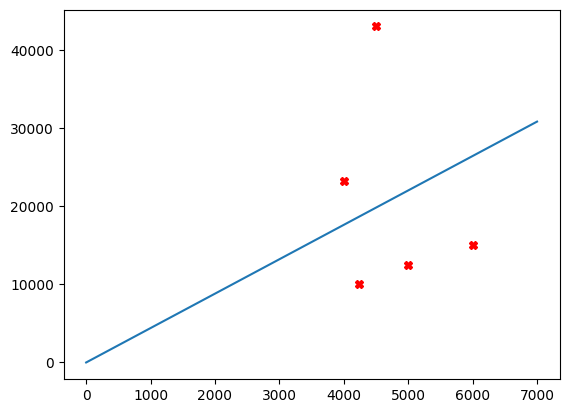

In [35]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Training data
X = np.array([[6000], [4000], [4500], [4230], [5000]])
y = np.array([15000, 23241, 43000, 9990, 12447])

# Creating and training a Linear Regression model
clf = LinearRegression()
clf.fit(X, y) 

# Retrieving the coefficients of the trained model
coef = clf.coef_
print("Coefficients:", coef)

# Plotting the training data and the linear regression line
plt.plot()
x_axis = np.linspace(0, 7000)
y_axis = [(0 - coef[0] * x) for x in x_axis]
plt.plot(x_axis, y_axis)
plt.plot(X, y, 'rX')

# Validation data
X_ = np.array([[1150], [2227]])
y_ = np.array([3499, 69900])

# Predicting target values for the validation set
y_predicted = clf.predict(X_)
print("Validation set type:", type(y_))
print("Predicted values for validation set:", y_predicted)

# Calculating the mean absolute error for the validation set
error = mean_absolute_error(y_, y_predicted)
print('Mean Absolute Error for validation set:', error)

# Deployment predictions
print("Deployment prediction for [[2815]]:", clf.predict([[2815]]))
print("Deployment prediction for [[4300]]:", clf.predict([[4300]]))

# Practical Example
download data from: https://data.mendeley.com/datasets/7dybx7wyfn/3
extract such that c:/mlworkshop has the folder 'C:/mlworkshopECG signals (1000 fragments)/MLII'

In [36]:
#import libraries
import os
%matplotlib inline
import numpy as np
from scipy import signal
from scipy.io import loadmat
from scipy.fftpack import fft

In [37]:
import os
from glob import glob
from scipy.io import loadmat
import numpy as np
from scipy.fftpack import fft

# Defining data folders and extraction
SIGNAL_FOLDER_PATH = 'ECG signals (1000 fragments)'
C1_path = SIGNAL_FOLDER_PATH + '/MLII/1 NSR'
C2_path = SIGNAL_FOLDER_PATH + '/MLII/3 AFL'

# Getting file lists for each class c1: Normal Sinus Rythm, c2: Atrial fibrilation
C1_list = glob(C1_path + '/*')
C2_list = glob(C2_path + '/*')

# Function for 1D signal normalization
def norm1d(sig):
    sig = np.float32(sig)
    sig -= np.min(sig)
    sig /= np.max(sig)
    return sig

# Function to extract FFT features and label from a mat file
def get_fft_label_mat(mat_file):
    # Extracting label from the file path
    label = mat_file.strip(os.path.basename(mat_file))
    label = label.strip(os.path.sep)
    label = label.split('/')[-1]
    
    # Loading mat file and extracting signal
    mat_dict = loadmat(mat_file)
    mat_signal = mat_dict['val']
    sig = norm1d(mat_signal[0])
    
    # Computing FFT features
    N = len(sig)
    fs = 360
    sig_fft = fft(sig)
    sig_fft = abs(sig_fft)[:N//2]
    
    return sig_fft, label

# Example usage of the functions
x, y = get_fft_label_mat(C2_list[0])
print("File Path:", C2_list[0])
print("FFT Features:", x)
print("Label:", y)


    
    

File Path: ECG signals (1000 fragments)/MLII/3 AFL\202m (0).mat
FFT Features: [6.7169763e+02 4.4309162e+01 2.4707912e+01 ... 2.8317961e-01 1.5032250e-01
 2.0517671e-01]
Label: 3 AFL


In [38]:
glob("ECG signals (1000 fragments)/*/*")

['ECG signals (1000 fragments)\\MLII\\1 NSR',
 'ECG signals (1000 fragments)\\MLII\\10 VT',
 'ECG signals (1000 fragments)\\MLII\\11 IVR',
 'ECG signals (1000 fragments)\\MLII\\12 VFL',
 'ECG signals (1000 fragments)\\MLII\\13 Fusion',
 'ECG signals (1000 fragments)\\MLII\\14 LBBBB',
 'ECG signals (1000 fragments)\\MLII\\15 RBBBB',
 'ECG signals (1000 fragments)\\MLII\\16 SDHB',
 'ECG signals (1000 fragments)\\MLII\\17 PR',
 'ECG signals (1000 fragments)\\MLII\\2 APB',
 'ECG signals (1000 fragments)\\MLII\\3 AFL',
 'ECG signals (1000 fragments)\\MLII\\4 AFIB',
 'ECG signals (1000 fragments)\\MLII\\5 SVTA',
 'ECG signals (1000 fragments)\\MLII\\6 WPW',
 'ECG signals (1000 fragments)\\MLII\\7 PVC',
 'ECG signals (1000 fragments)\\MLII\\8 Bigeminy',
 'ECG signals (1000 fragments)\\MLII\\9 Trigeminy']

In [39]:
# list of files belonging to the second class.
print(C2_list)

['ECG signals (1000 fragments)/MLII/3 AFL\\202m (0).mat', 'ECG signals (1000 fragments)/MLII/3 AFL\\202m (1).mat', 'ECG signals (1000 fragments)/MLII/3 AFL\\202m (2).mat', 'ECG signals (1000 fragments)/MLII/3 AFL\\202m (3).mat', 'ECG signals (1000 fragments)/MLII/3 AFL\\203m (0).mat', 'ECG signals (1000 fragments)/MLII/3 AFL\\203m (1).mat', 'ECG signals (1000 fragments)/MLII/3 AFL\\203m (2).mat', 'ECG signals (1000 fragments)/MLII/3 AFL\\222m (0).mat', 'ECG signals (1000 fragments)/MLII/3 AFL\\222m (1).mat', 'ECG signals (1000 fragments)/MLII/3 AFL\\222m (10).mat', 'ECG signals (1000 fragments)/MLII/3 AFL\\222m (11).mat', 'ECG signals (1000 fragments)/MLII/3 AFL\\222m (12).mat', 'ECG signals (1000 fragments)/MLII/3 AFL\\222m (2).mat', 'ECG signals (1000 fragments)/MLII/3 AFL\\222m (3).mat', 'ECG signals (1000 fragments)/MLII/3 AFL\\222m (4).mat', 'ECG signals (1000 fragments)/MLII/3 AFL\\222m (5).mat', 'ECG signals (1000 fragments)/MLII/3 AFL\\222m (6).mat', 'ECG signals (1000 fragment

In [40]:
# Combining file lists for both classes
all_list = C1_list + C2_list

# Iterating through the combined list and printing data
for mat_file in all_list:
    # Using the get_fft_label_mat function to extract FFT features and label
    x, y = get_fft_label_mat(mat_file)
    
    # Printing file path, FFT features, and label
    print("File Path:", mat_file)
    print("FFT Features:", x)
    print("Label:", y)
    print("\n")


File Path: ECG signals (1000 fragments)/MLII/1 NSR\100m (0).mat
FFT Features: [6.3587854e+02 1.2047599e+01 1.6520775e+01 ... 8.4283695e-02 1.0343695e-01
 2.9277432e-01]
Label: 1 NSR


File Path: ECG signals (1000 fragments)/MLII/1 NSR\100m (1).mat
FFT Features: [6.3628442e+02 4.0731441e+01 1.4781268e+01 ... 8.5639954e-02 4.8098624e-02
 2.1775635e-01]
Label: 1 NSR


File Path: ECG signals (1000 fragments)/MLII/1 NSR\100m (2).mat
FFT Features: [6.9094238e+02 1.8235174e+01 6.6140461e+00 ... 9.8566622e-02 8.1284463e-02
 1.9769511e-01]
Label: 1 NSR


File Path: ECG signals (1000 fragments)/MLII/1 NSR\100m (3).mat
FFT Features: [6.26259583e+02 3.12438049e+01 1.21703587e+01 ... 8.42780545e-02
 1.19196296e-01 2.99959660e-01]
Label: 1 NSR


File Path: ECG signals (1000 fragments)/MLII/1 NSR\100m (4).mat
FFT Features: [5.9076984e+02 1.0326145e+01 3.1357255e+00 ... 3.6484802e-01 2.8433830e-01
 1.7660490e-01]
Label: 1 NSR


File Path: ECG signals (1000 fragments)/MLII/1 NSR\100m (5).mat
FFT Featur

In [41]:
#fetching the data, appending data to list and printing

X = []
Y = []

all_list = C1_list
[all_list.append(i) for i in C2_list]

for mat_file in all_list:
    x,y = get_fft_label_mat(mat_file)
    print(mat_file)
    X.append(x)
    Y.append(y)
    print(x)
    print(y)
X= np.array(X)
Y= np.array(Y)

ECG signals (1000 fragments)/MLII/1 NSR\100m (0).mat
[6.3587854e+02 1.2047599e+01 1.6520775e+01 ... 8.4283695e-02 1.0343695e-01
 2.9277432e-01]
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\100m (1).mat
[6.3628442e+02 4.0731441e+01 1.4781268e+01 ... 8.5639954e-02 4.8098624e-02
 2.1775635e-01]
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\100m (2).mat
[6.9094238e+02 1.8235174e+01 6.6140461e+00 ... 9.8566622e-02 8.1284463e-02
 1.9769511e-01]
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\100m (3).mat
[6.26259583e+02 3.12438049e+01 1.21703587e+01 ... 8.42780545e-02
 1.19196296e-01 2.99959660e-01]
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\100m (4).mat
[5.9076984e+02 1.0326145e+01 3.1357255e+00 ... 3.6484802e-01 2.8433830e-01
 1.7660490e-01]
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\100m (5).mat
[6.0535278e+02 3.0015821e+01 5.8118472e+00 ... 3.2052398e-02 9.5526129e-02
 2.8258052e-01]
1 NSR
ECG signals (1000 fragments)/MLII/1 NSR\100m (6).mat
[6.7170575e+02 4.1304863e+01 7.3381190e+0

In [42]:
#display data size
X.shape, Y.shape

((303, 1800), (303,))

In [43]:
# taking only first 100 fft coeffficients
X = X[:,:100]
X.shape

(303, 100)

In [44]:
#splitting data into train and test sets
# this helps in validating the model

from sklearn.model_selection import train_test_split
Xtrain, Xval, Ytrain, Yval = train_test_split(X,Y,test_size=0.25, random_state=42)


In [45]:
# Importing classifier and training it

from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(1000, 4000, 256, 50), random_state=1)
clf.fit(Xtrain, Ytrain)   
#clf object is now a trained model

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(1000, 4000, 256, 50),
              random_state=1, solver='lbfgs')

In [46]:
#testing the trained classifier
Ypred = clf.predict(Xval)
print(Ypred)
print(Yval)

['1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR'
 '1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR'
 '1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR' '3 AFL' '1 NSR'
 '1 NSR' '1 NSR' '1 NSR' '1 NSR' '3 AFL' '1 NSR' '1 NSR' '1 NSR' '1 NSR'
 '1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR'
 '1 NSR' '1 NSR' '1 NSR' '3 AFL' '1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR'
 '1 NSR' '1 NSR' '1 NSR' '1 NSR' '3 AFL' '1 NSR' '1 NSR' '1 NSR' '1 NSR'
 '1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR'
 '1 NSR' '1 NSR' '1 NSR' '1 NSR']
['1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR'
 '1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR'
 '3 AFL' '1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR' '3 AFL' '1 NSR'
 '1 NSR' '1 NSR' '1 NSR' '1 NSR' '3 AFL' '1 NSR' '1 NSR' '1 NSR' '1 NSR'
 '1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR' '1 NSR'
 '1 NSR' '1 NSR' 

In [47]:
#validating the predictions
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm = confusion_matrix(Yval,Ypred)
print(cm)
cr = classification_report(Yval,Ypred)
print(cr)
acs = accuracy_score(Yval, Ypred)
print(acs)

[[71  0]
 [ 1  4]]
              precision    recall  f1-score   support

       1 NSR       0.99      1.00      0.99        71
       3 AFL       1.00      0.80      0.89         5

    accuracy                           0.99        76
   macro avg       0.99      0.90      0.94        76
weighted avg       0.99      0.99      0.99        76

0.9868421052631579


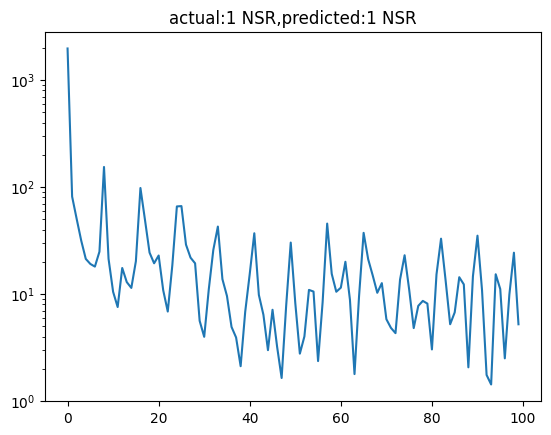

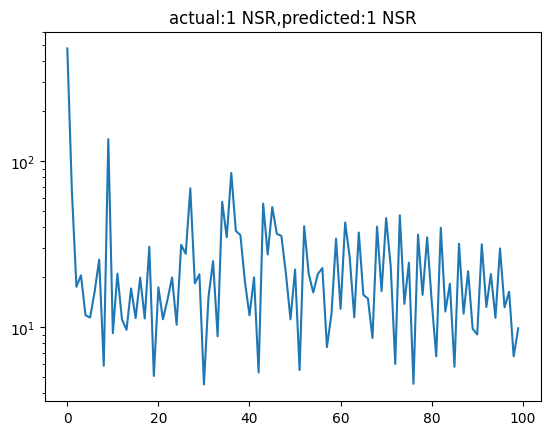

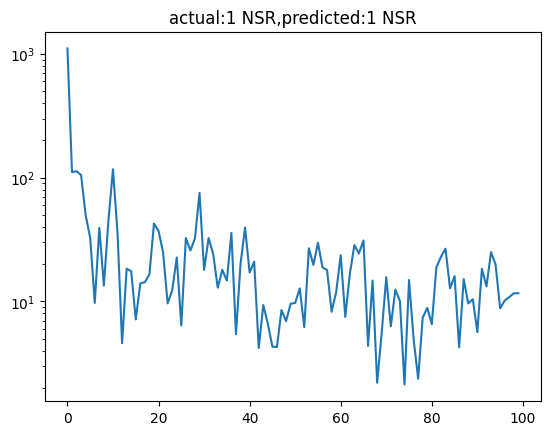

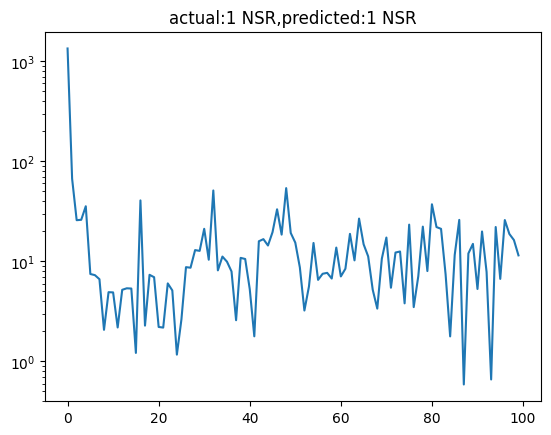

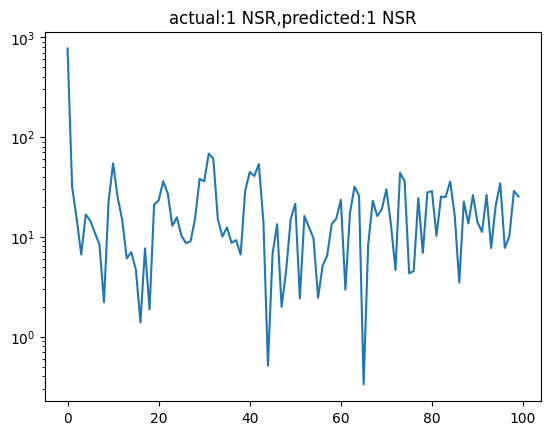

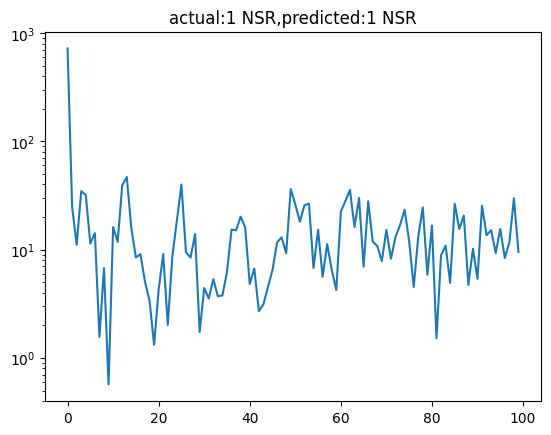

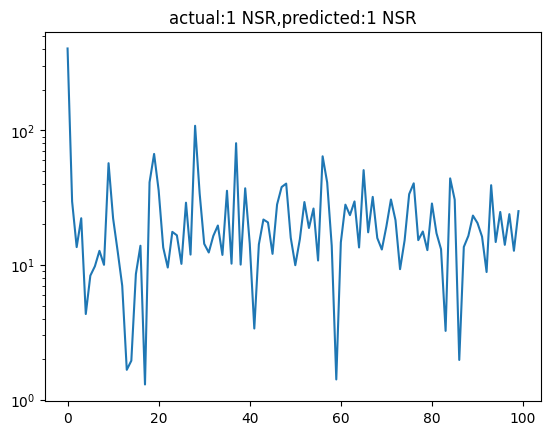

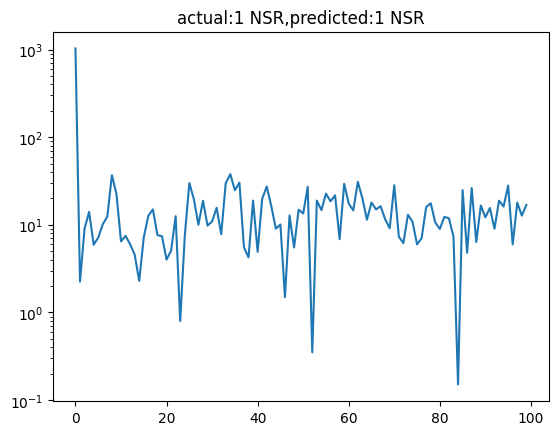

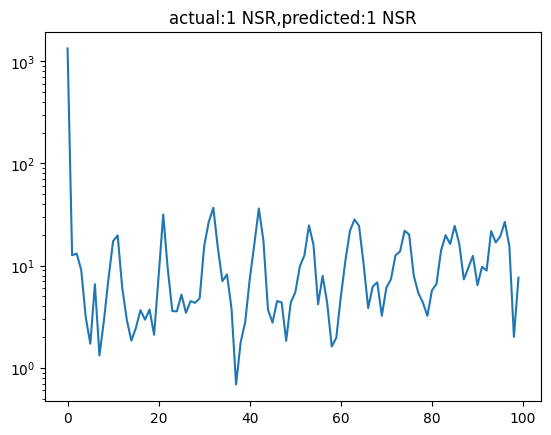

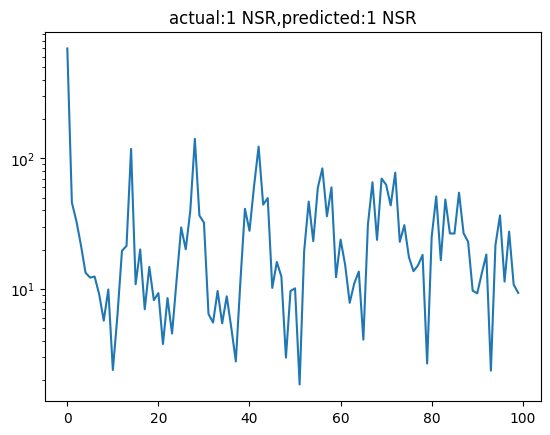

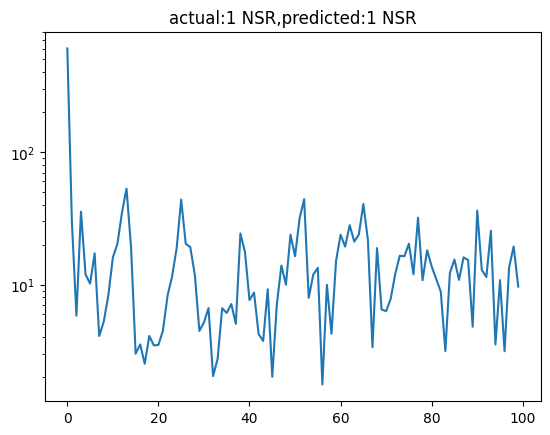

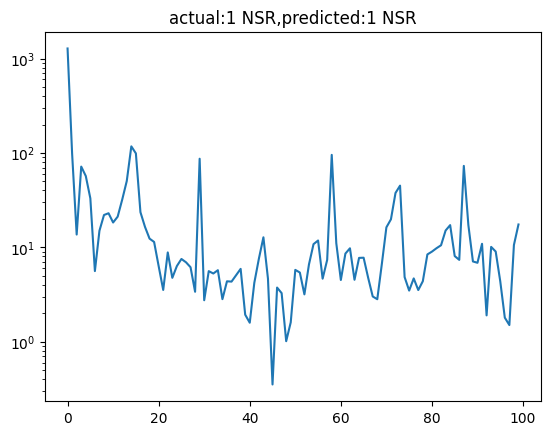

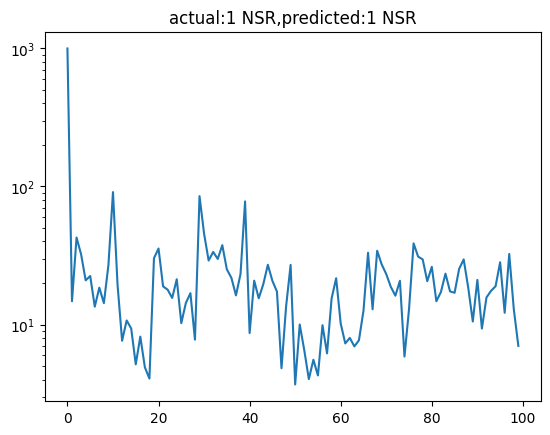

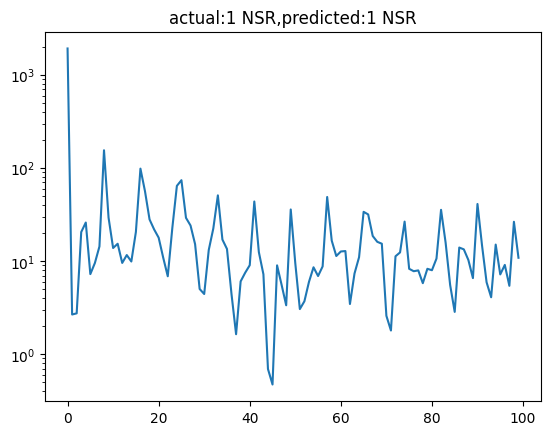

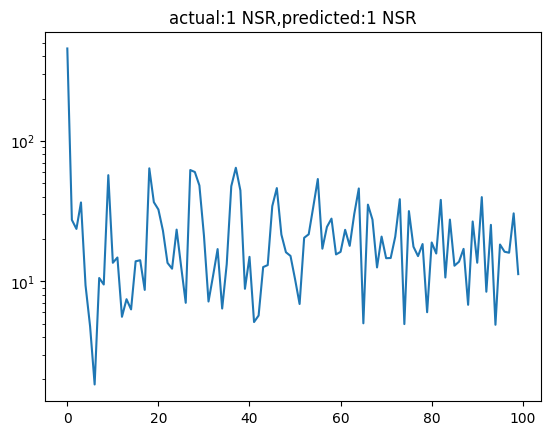

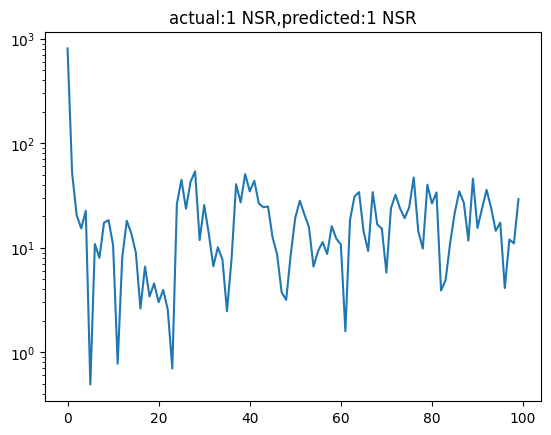

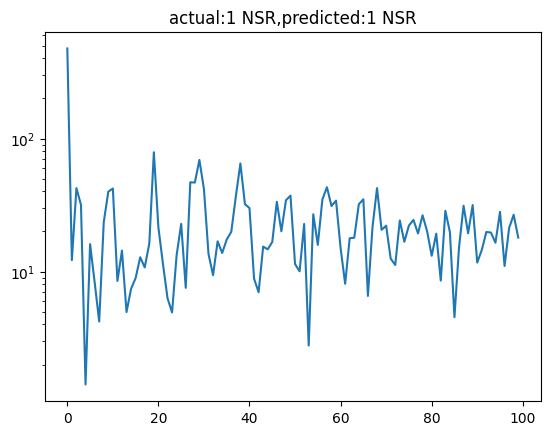

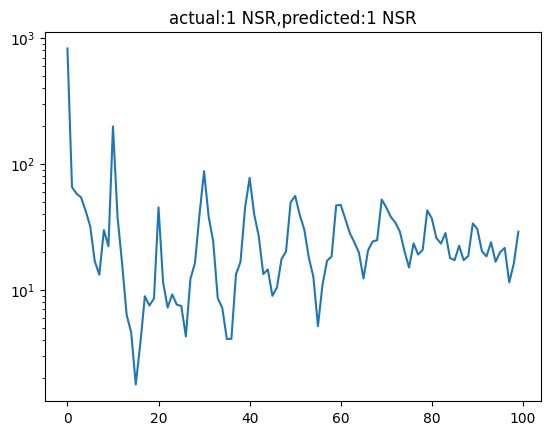

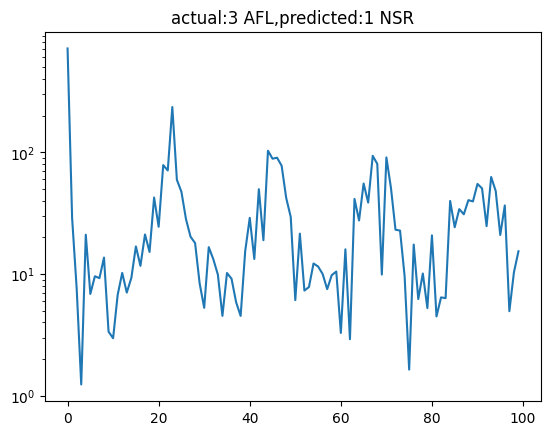

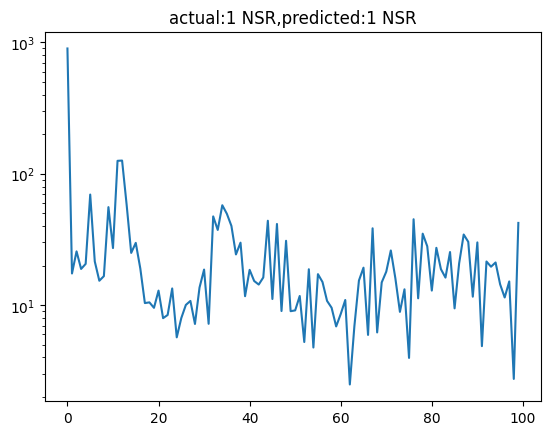

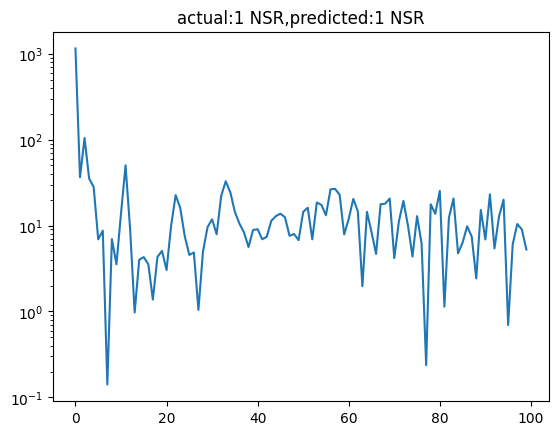

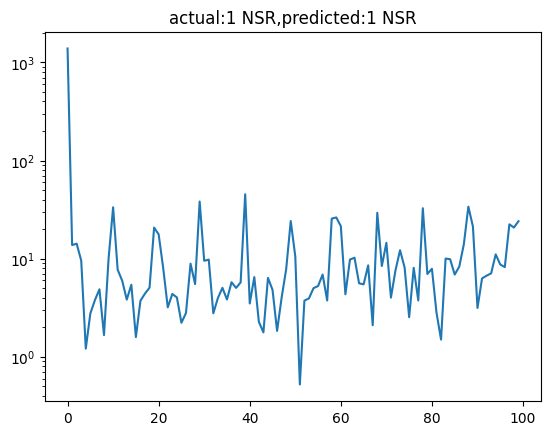

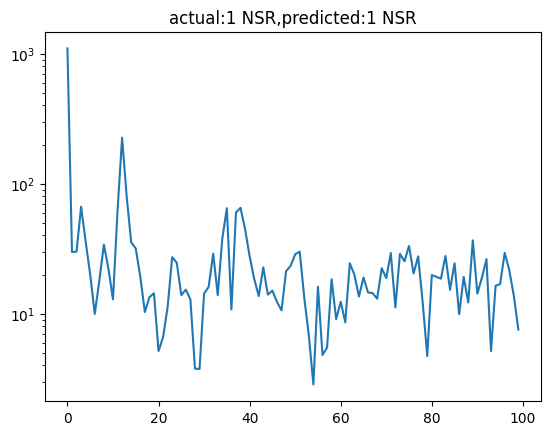

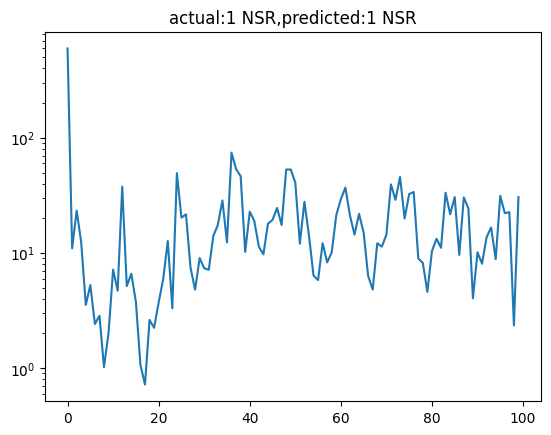

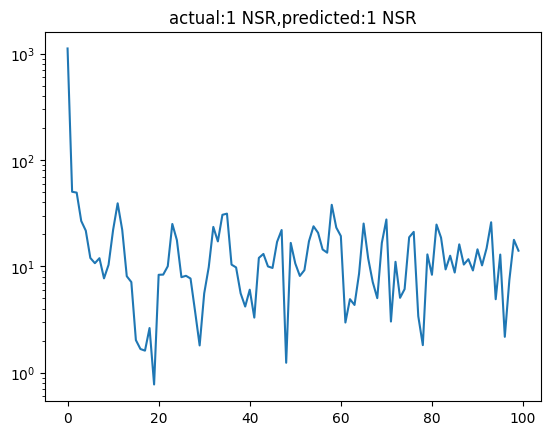

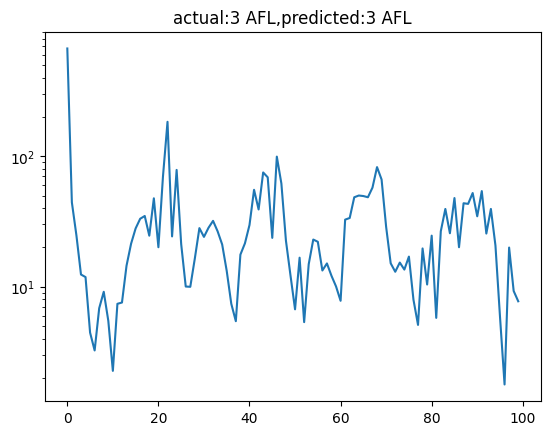

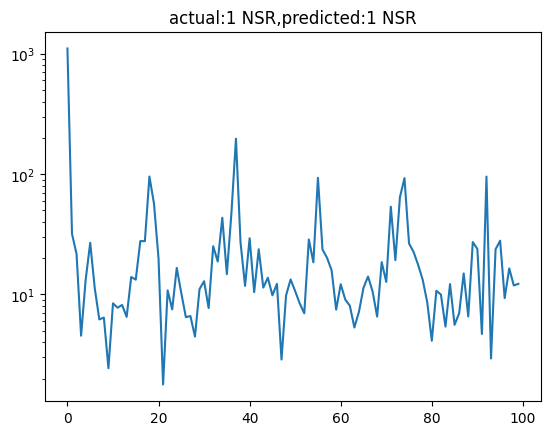

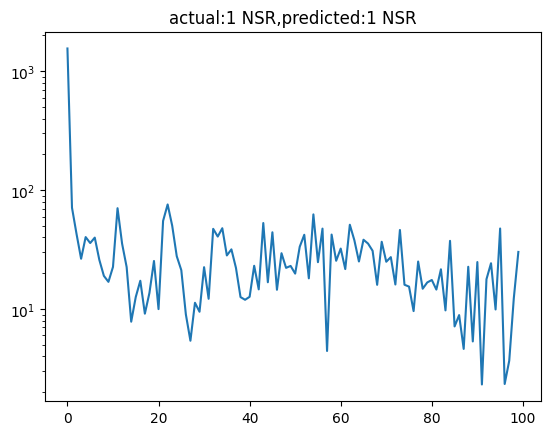

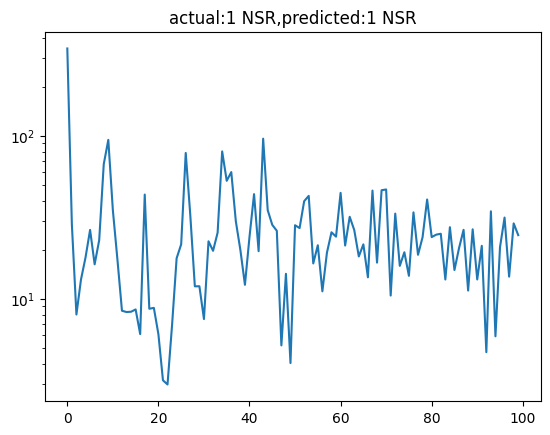

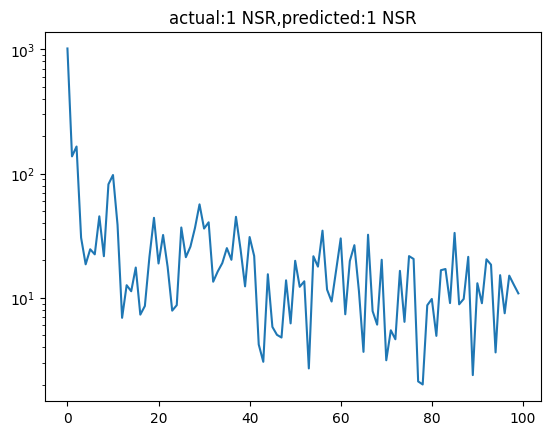

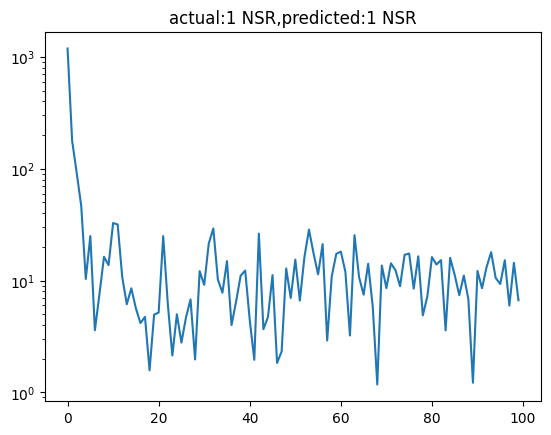

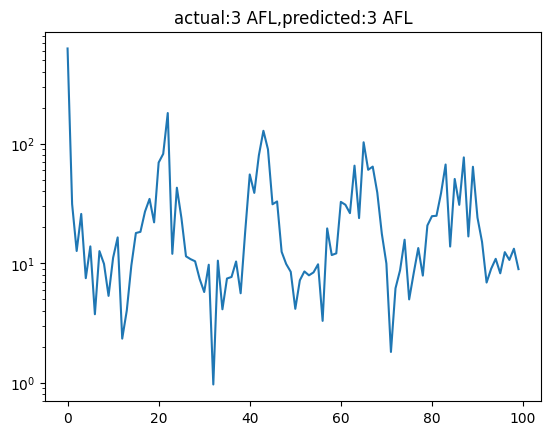

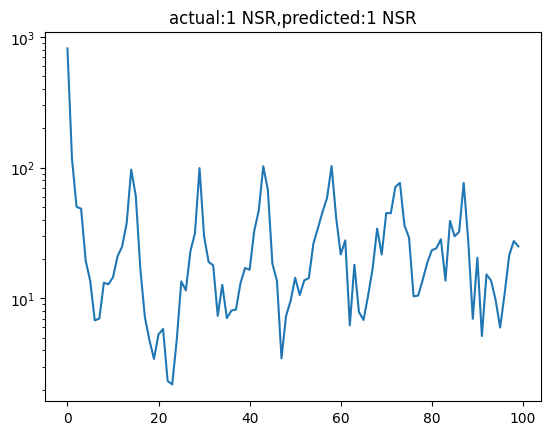

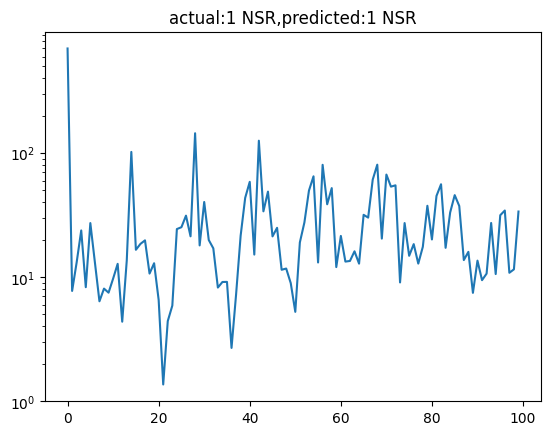

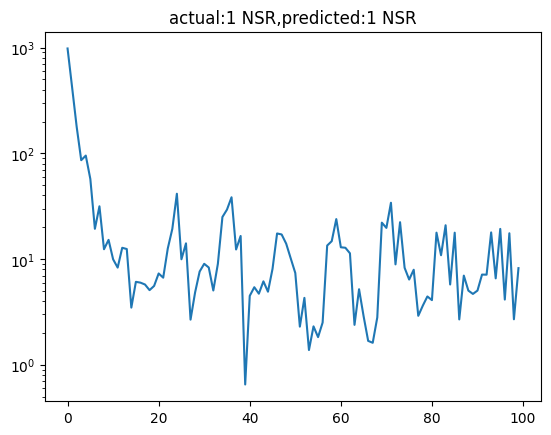

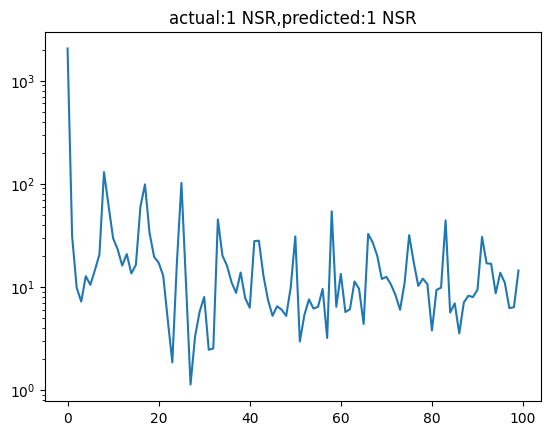

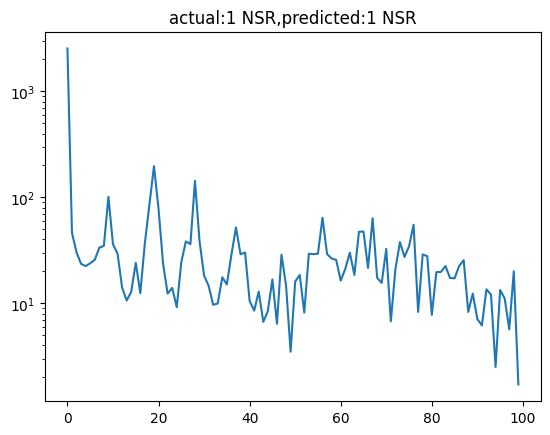

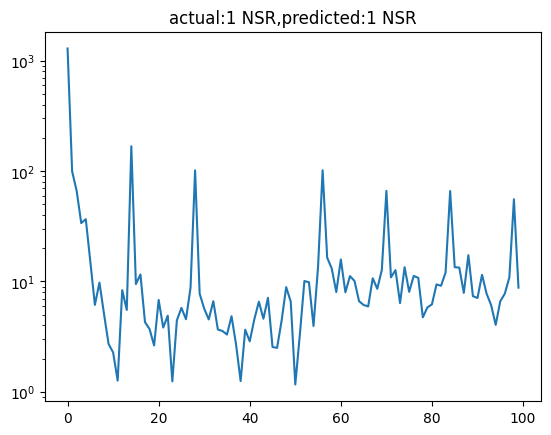

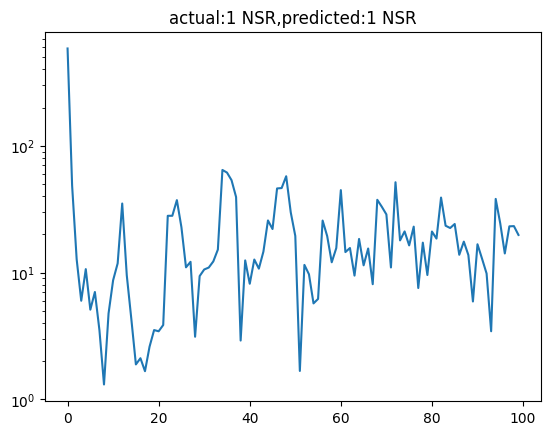

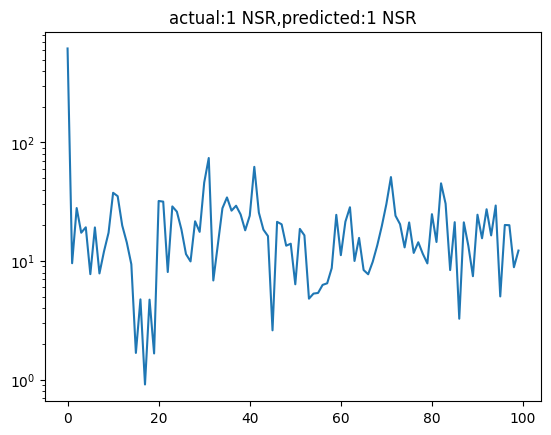

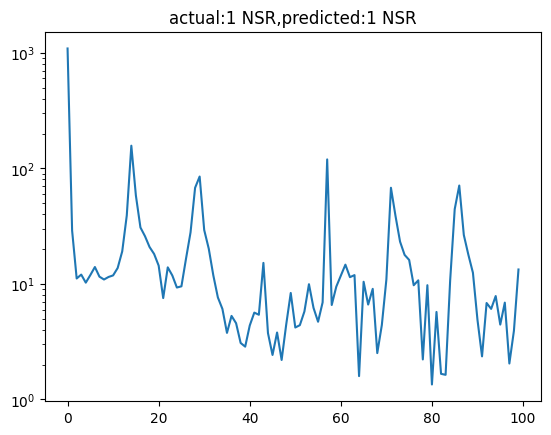

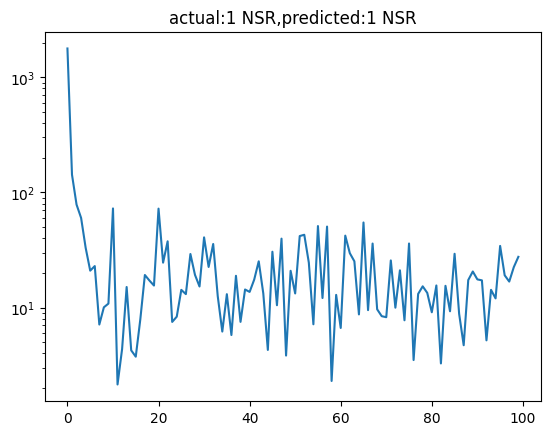

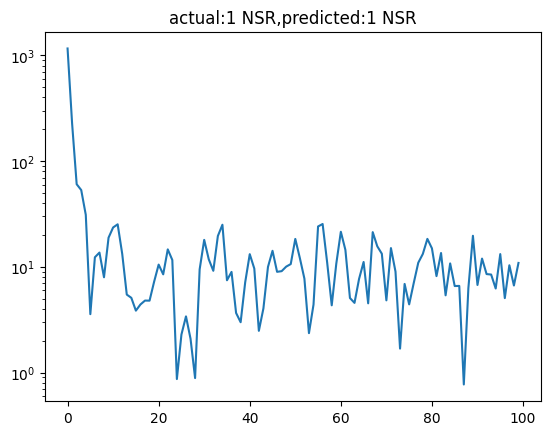

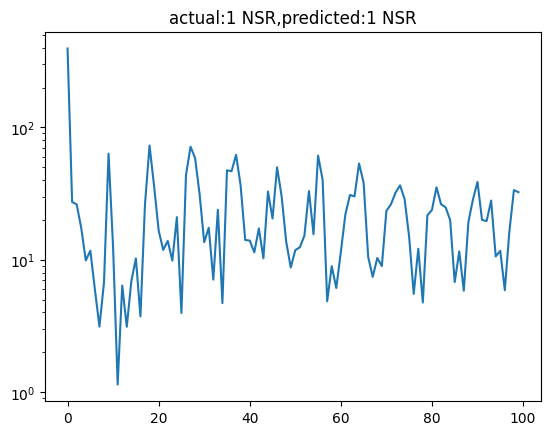

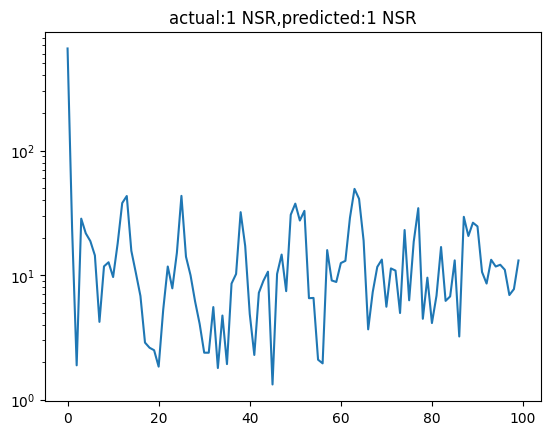

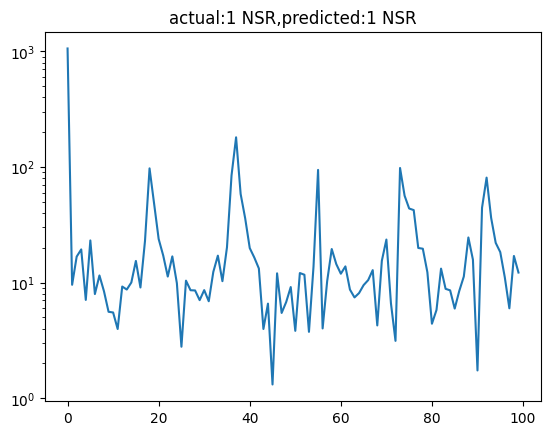

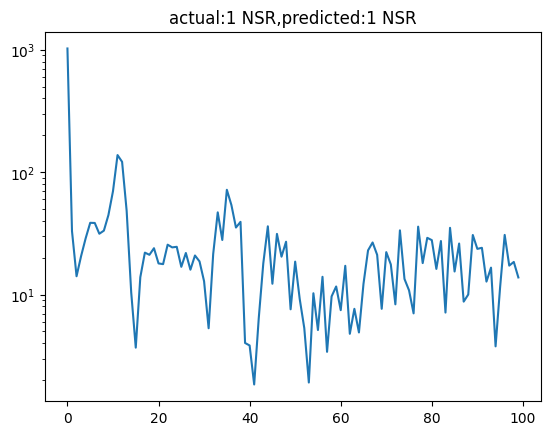

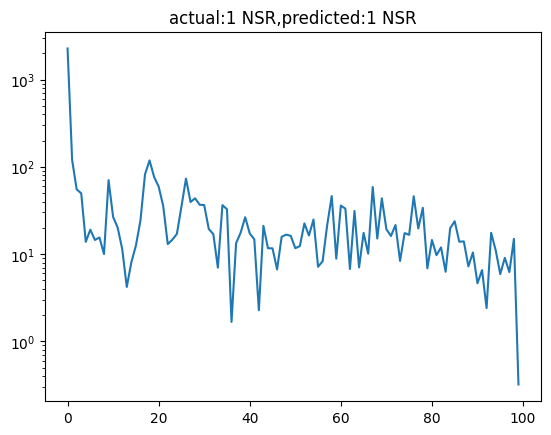

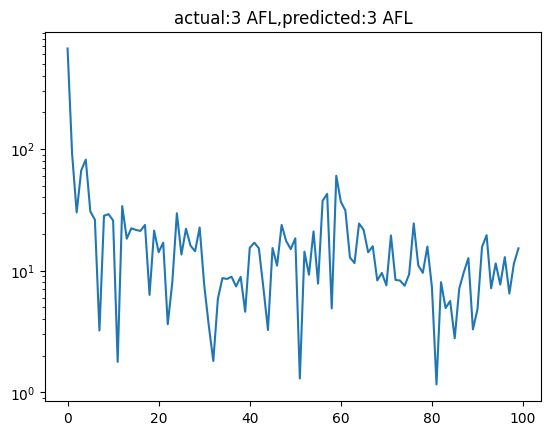

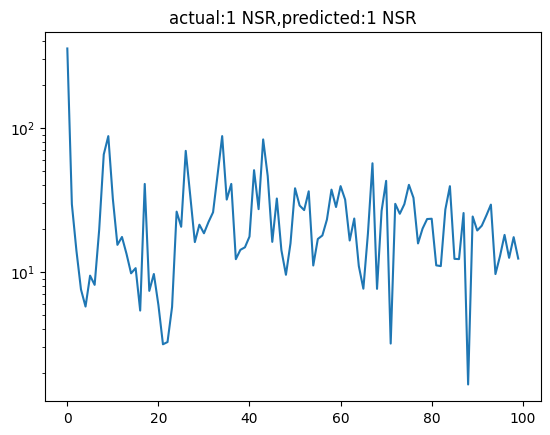

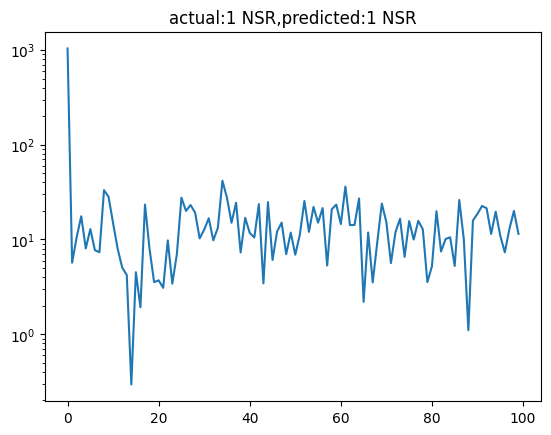

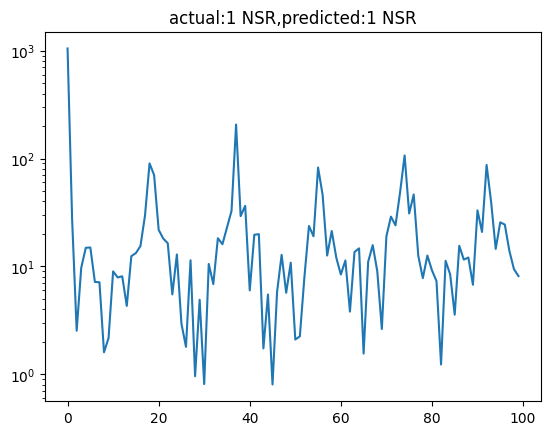

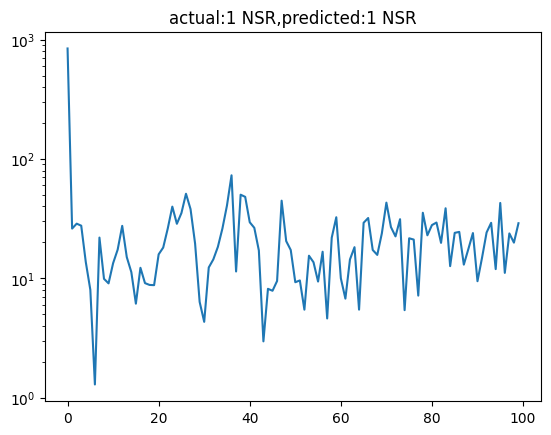

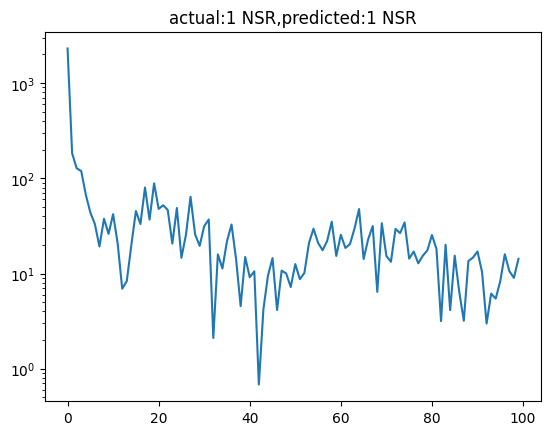

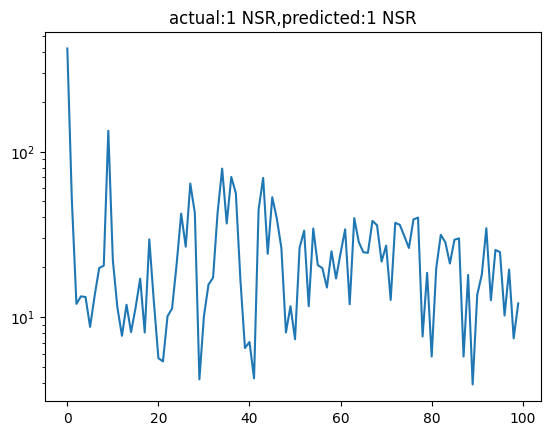

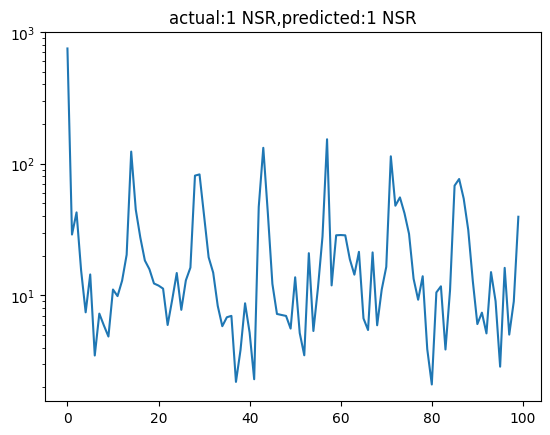

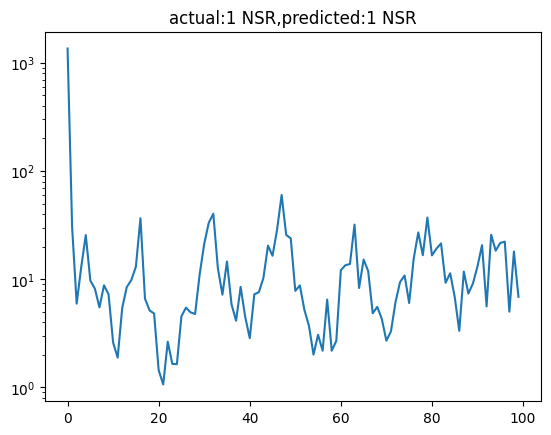

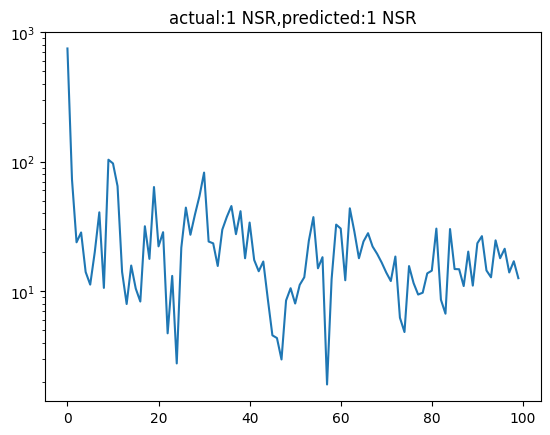

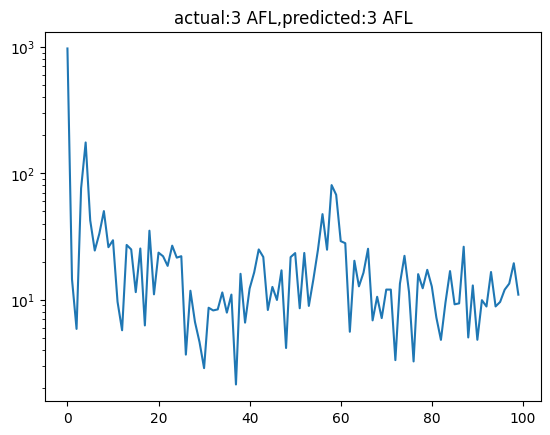

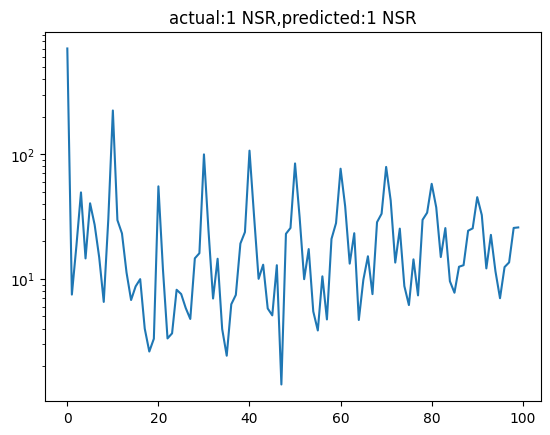

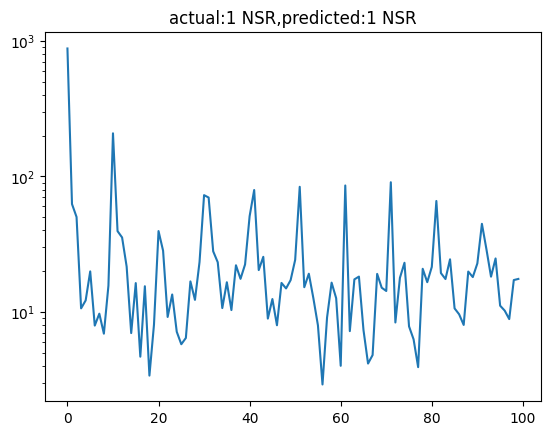

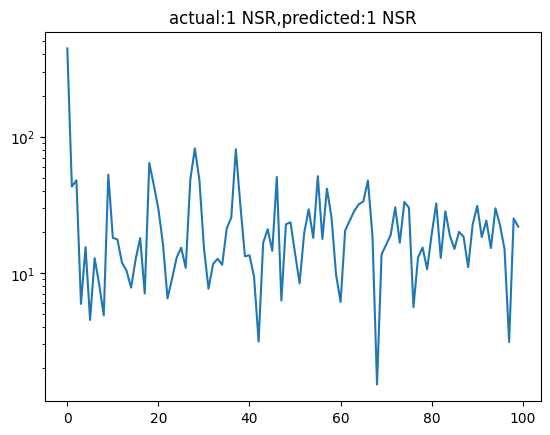

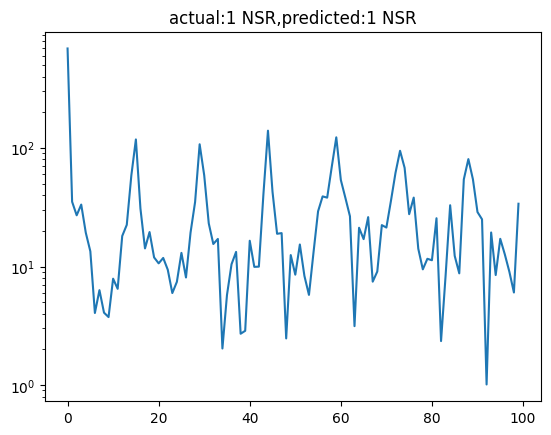

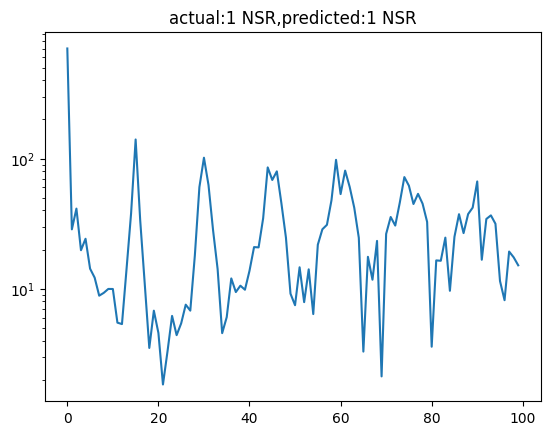

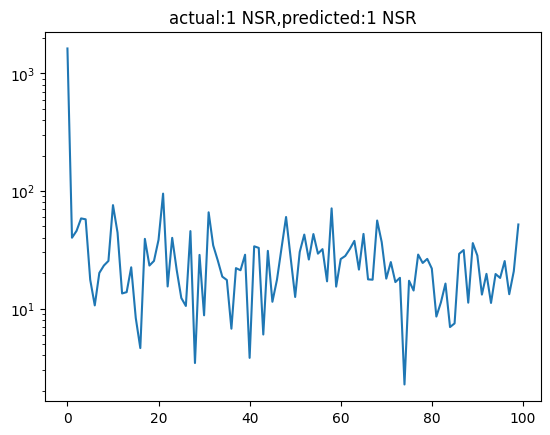

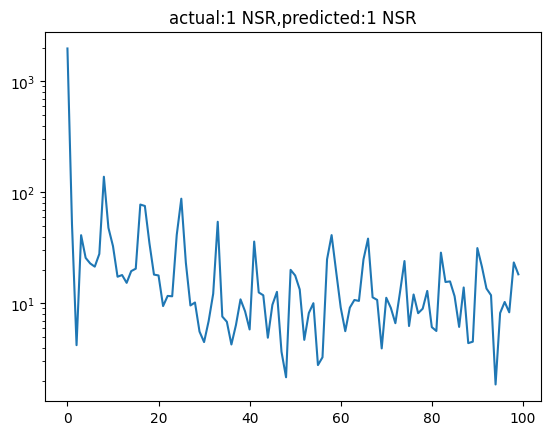

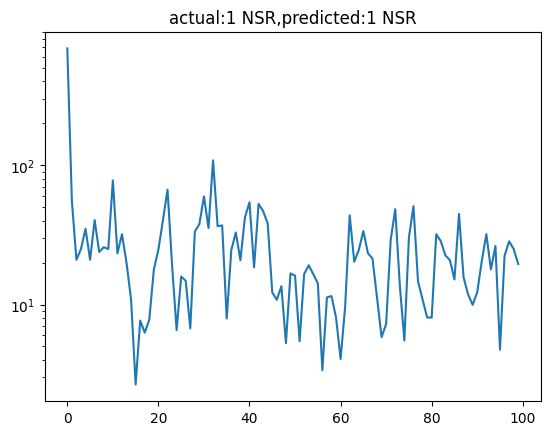

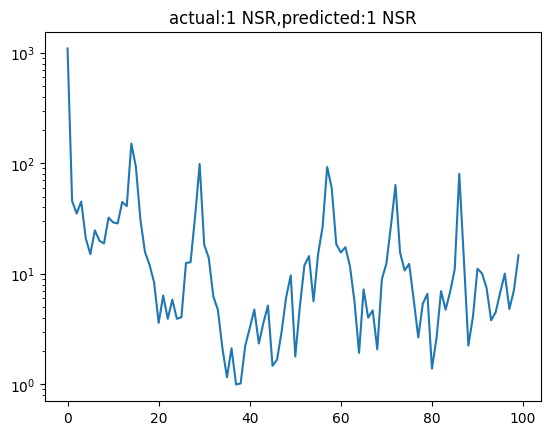

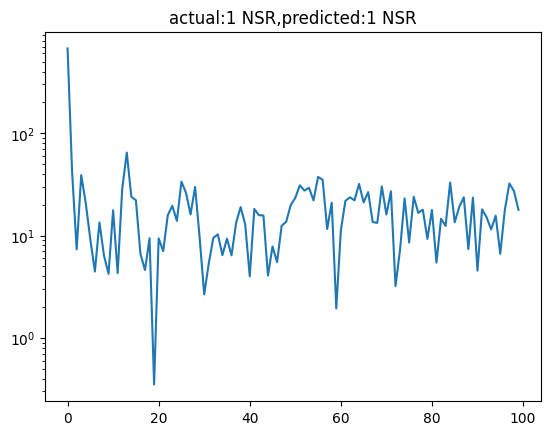

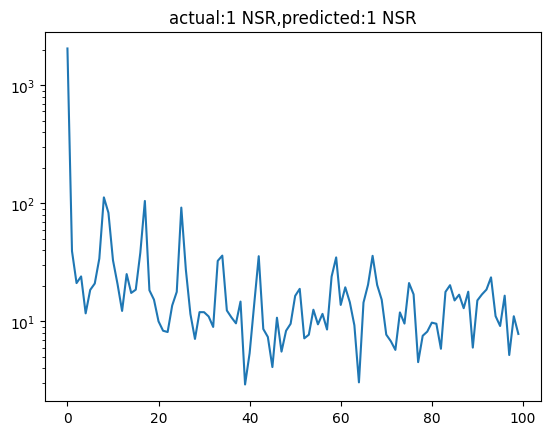

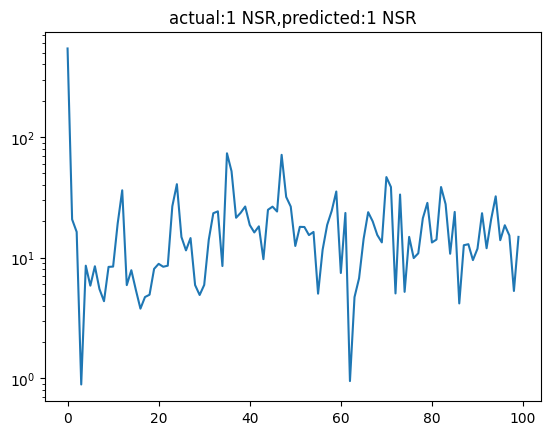

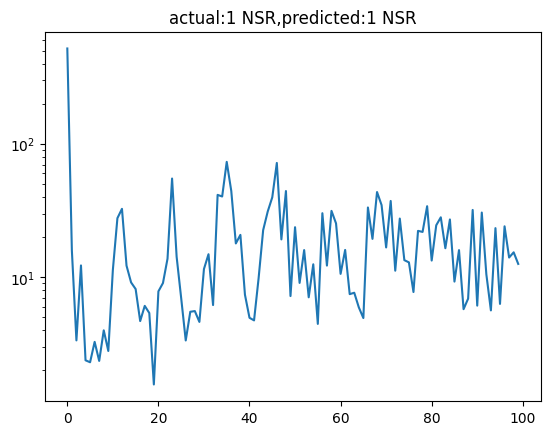

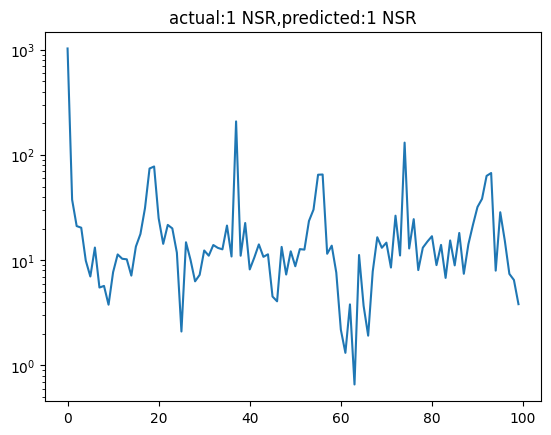

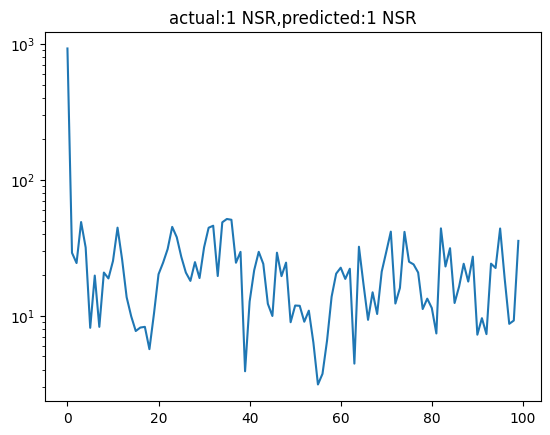

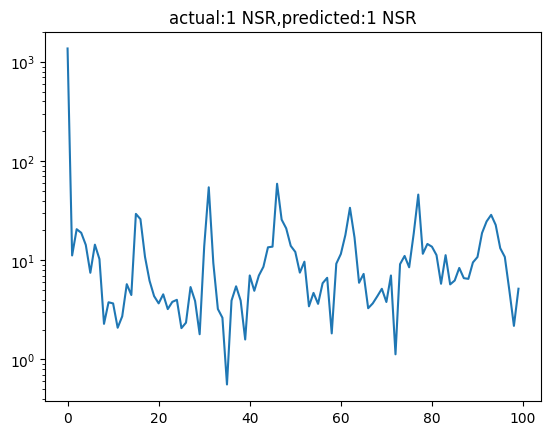

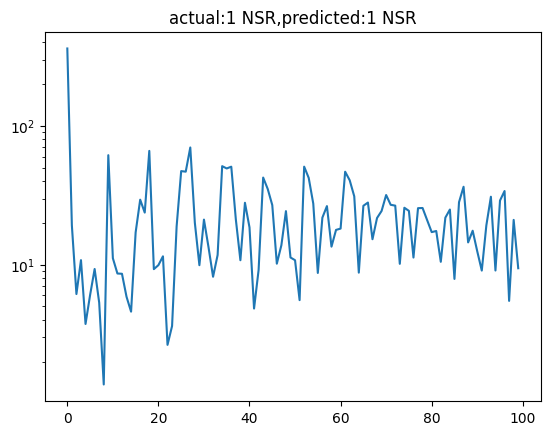

In [48]:
#displaying the data and prediction and actual labels
import matplotlib.pyplot as plt
for (a,b,c) in zip(Xval,Yval,Ypred):
    plt.semilogy(a)
    plt.title("actual:{},predicted:{}".format(b,c))
    plt.show()
